In [1]:
from mdagent import MDAgent
import os
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_4_descriptive = get_prompt("descriptive", 4)
prompt_4_natural = get_prompt("natural", 4)

prompt_4_descriptive, prompt_4_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD.',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD of the simulation.')

In [3]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_4_descriptive)

Thought: To complete the tasks, I will follow these steps:
1. Download the PDB file 1LYZ.
2. Compute the secondary structure assignments for the downloaded PDB structure.
3. Set up and run a short simulation for 1 picosecond at 300 K.
4. Compute the RMSD of the simulation.

I will start by downloading the PDB file 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1LYZ"
  }
}
```PDB file found with this ID: 1LYZ
To proceed with the tasks, I will now compute the secondary structure assignments for the downloaded PDB structure 1LYZ.

Action:
```json
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_022846",
    "target_frames": "first"
  }
}
```To continue with the tasks, I will now set up and run a short simulation for 1 picosecond at 300 K using the downloaded PDB file 1LYZ.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_022846",
    "forcefield_files": ["amber99sb.xml", "tip3p

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_022846: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_022846
 rec0_022847: dssp values for trajectory with id: 1LYZ_022846
 1LYZ_022903: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_022907: Initial positions for simulation sim0_022907
 sim0_022907: Basic Simulation of Protein 1LYZ_022903
 rec0_022907: Simulation trajectory for protein 1LYZ_022903 and simulation sim0_022907
 rec1_022907: Simulation state log for protein 1LYZ_022903 and simulation sim0_022907
 rec2_022907: Simulation pdb frames for protein 1LYZ_022903 and simulation sim0_022907
 rmsd_022907: RMSD for 022907
 fig0_022913: RMSD plot for 022907


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_022846"))

In [8]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_022846", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [9]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("top_sim0_022907")
top_path_1 = registry_1.get_mapped_path("rec0_022907")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

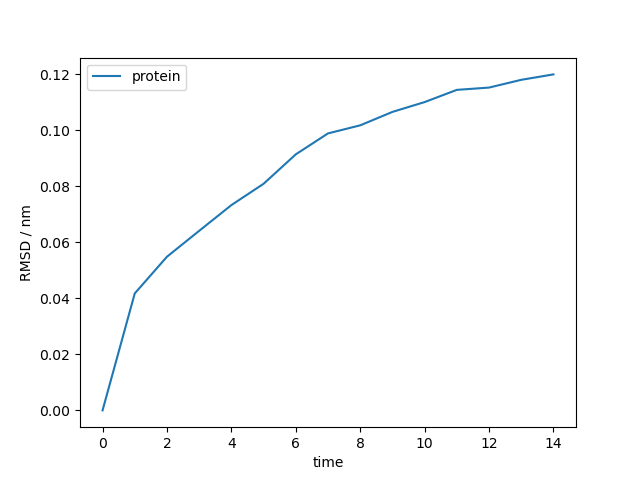

In [10]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_022913'))

In [11]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_4_natural)

Thought: To address the question, I need to perform the following steps:

1. Download the PDB file for 1LYZ.
2. Set up and run a molecular dynamics simulation for 1 picosecond at 300 K.
3. Report the secondary structure assignments of the downloaded PDB structure.
4. Compute the RMSD of the simulation.

I will start by downloading the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1LYZ"
  }
}
```PDB file found with this ID: 1LYZ
To continue with the task, I need to set up and run a molecular dynamics simulation for 1 picosecond at 300 K using the downloaded PDB file (1LYZ_023032). After the simulation, I will report the secondary structure assignments and compute the RMSD.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_023032",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "N

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [12]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_023032: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_023032
 1LYZ_023039: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_023044: Initial positions for simulation sim0_023044
 sim0_023044: Basic Simulation of Protein 1LYZ_023039
 rec0_023044: Simulation trajectory for protein 1LYZ_023039 and simulation sim0_023044
 rec1_023044: Simulation state log for protein 1LYZ_023039 and simulation sim0_023044
 rec2_023044: Simulation pdb frames for protein 1LYZ_023039 and simulation sim0_023044
 rec0_023050: dssp values for trajectory with id: rec2_023044
 rmsd_023044: RMSD for 023044
 fig0_023053: RMSD plot for 023044


In [15]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_023032"))

In [16]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_023032", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [17]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_023044")
top_path_2 = registry_2.get_mapped_path("top_sim0_023044")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

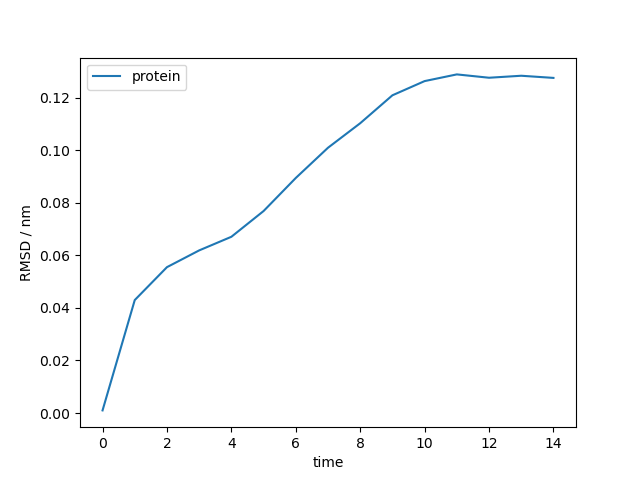

In [18]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023053'))